In [3]:
# Perceptron Algorithm for linear function

import numpy as np

class Perceptron:
    
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        y_ = np.array([1 if i>0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
    
                update = self.lr * (y_[idx] - y_predicted) # using MSE cost function
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
    def _unit_step_func(self, x):
        return np.where(x>0, 1, 0)

0.9393939393939394


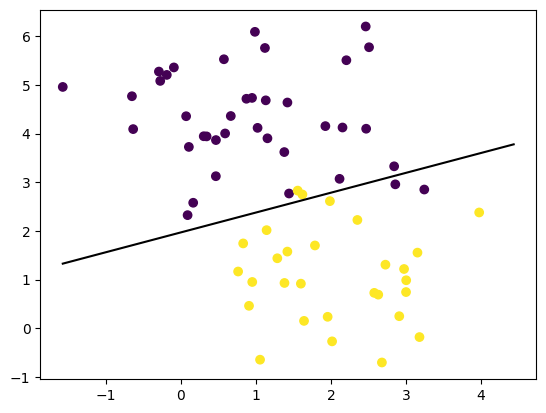

In [4]:
# test

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def accuracy(y_true, y_test):
    return np.sum(y_true == y_test) / len(y_true)

p = Perceptron()
p.fit(X_train, y_train)
predicted = p.predict(X_test)
acc = accuracy(y_test, predicted)
print(acc)

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train)

x0_1 = np.amin(X[:,0])
x0_2 = np.amax(X[:,0])

x1_1 = (- p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (- p.weights[0] * x0_2 - p.bias) / p.weights[1]

plt.plot([x0_1, x0_2],[x1_1,x1_2],"k")
plt.show()

## Batch Training

In [1]:
# Perceptron with batch training

import numpy as np

class Perceptron_batch:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        y_ = np.array([1 if i>0 else -1 for i in y]) # classify -1 and +1
        
        for _ in range(self.n_iters):
            mis = [] # misclassification indices
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                if linear_output * y_[idx] <= 0: # misclassification happened
                    mis.append(idx)
            if len(mis) != 0:
                for i in mis:
                    dw = np.sum([y_[i] * X[i] for i in mis], axis=0)
                    db = np.sum([y_[i] for i in mis])
                    self.weights += self.lr * dw
                    self.bias += self.lr * db
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
    def _unit_step_func(self, x):
        return np.where(x>0, 1, -1)

0.9393939393939394


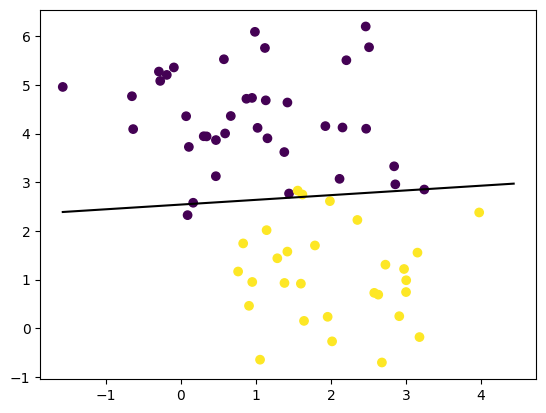

In [2]:
# test

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

p = Perceptron_batch()
p.fit(X_train, y_train)
predicted = p.predict(X_test)

def accuracy(y_true, y_test):
    return np.sum(y_true == y_test) / len(y_true)

y_test = np.where(y_test==1, y_test, -1)
acc = accuracy(y_test, predicted)
print(acc)


f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train)

x0_1 = np.amin(X[:,0])
x0_2 = np.amax(X[:,0])

x1_1 = (- p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (- p.weights[0] * x0_2 - p.bias) / p.weights[1]

plt.plot([x0_1, x0_2],[x1_1,x1_2],"k")
plt.show()

## Mini-Batch Training
### If batch_size = 1, then it is stochastic training

In [27]:
# Perceptron with mini-batch training(stochastic gradient descent)

import numpy as np

class Perceptron_mini_batch:
    
    def __init__(self, learning_rate=0.01, n_iters=100, batch_size=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        y_ = np.array([1 if i>0 else -1 for i in y]) # classify -1 and +1
        
        for _ in range(self.n_iters):
            # Shuffle and get each subset of samples for mini-batches
            x_batch_list, y_batch_list = self._mini_batch(X, y_, self.batch_size)
            
            for x_batch, y_batch in zip(x_batch_list, y_batch_list):
    
                for idx, x_i in enumerate(x_batch):
                    dw = []
                    db = []
                    linear_output = np.dot(x_i, self.weights) + self.bias
                    if linear_output * y_batch[idx] <= 0:
                        dw.append(y_batch[idx] * x_i)
                        db.append(y_batch[idx])
                    if len(dw) == 0:
                        break
                    self.weights += (self.lr/len(dw)) * np.array(dw).reshape(-1)
                    self.bias += (self.lr/len(db)) * np.array(db).reshape(-1)
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_func(linear_output)
        return y_pred
    
    def _unit_step_func(self, x):
        return np.where(x>0, 1, -1)
    
    def _mini_batch(self, X, y, batch_size):
        n_batch = int(self.n_samples / batch_size)
        idxShuffle = np.random.permutation(self.n_samples)
        X_batch = []
        y_batch = []
        for idxSet in range(n_batch):
            X_shuffle = X[idxShuffle[idxSet*n_batch : (idxSet+1)*n_batch], :]
            X_batch.append(X_shuffle)
            y_shuffle = y[idxShuffle[idxSet*n_batch : (idxSet+1)*n_batch]]
            y_batch.append(y_shuffle)
        return np.array(X_batch), np.array(y_batch)
        

0.9393939393939394


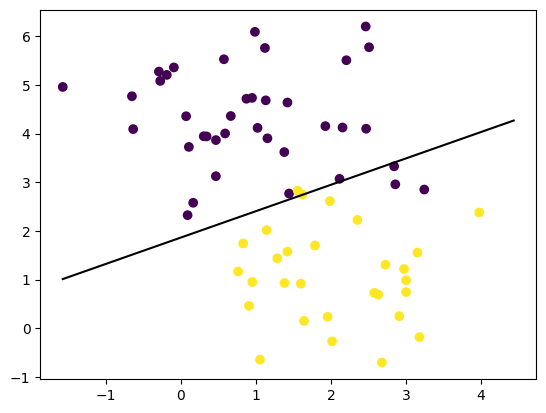

In [30]:
# test

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

p = Perceptron_mini_batch()
p.fit(X_train, y_train)
predicted = p.predict(X_test)

def accuracy(y_true, y_test):
    return np.sum(y_true == y_test) / len(y_true)

y_test = np.where(y_test==1, y_test, -1)
acc = accuracy(y_test, predicted)
print(acc)


f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], c=y_train)

x0_1 = np.amin(X[:,0])
x0_2 = np.amax(X[:,0])

x1_1 = (- p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (- p.weights[0] * x0_2 - p.bias) / p.weights[1]

plt.plot([x0_1, x0_2],[x1_1,x1_2],"k")
plt.show()